In [71]:
from IPython.display import Image as ImageDisp
from PIL import Image
import sys
import pytesseract
from pathlib import Path
import cv2
import numpy as np
from pytesseract import TesseractError
from matplotlib import pyplot as plt
import pandas as pd



ModuleNotFoundError: No module named 'pandas'

In [2]:
def imshow(img, size=8):
    plt.figure(figsize = (size, size))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation='nearest', aspect='auto')

In [3]:
img = cv2.imread('/Users/eric/Desktop/processed_images/gaslamp/201402.png')

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl 

def cluster_colors(img, n_clusters=12):
    from sklearn.cluster import KMeans

    pixels = img.reshape((img.shape[0] * img.shape[1], 3))

    clt = KMeans(n_clusters = n_clusters)
    clt.fit(pixels)
    
    return clt

clt = cluster_colors(img)   

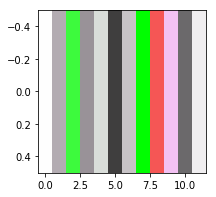

In [5]:
centers = clt.cluster_centers_.astype('uint8')
centers_img = np.round(centers.reshape((1,12,3)))

imshow(centers_img, size=3)


In [6]:
cv2.cvtColor(centers_img, cv2.COLOR_BGR2HSV).reshape((centers_img.shape[0] * centers_img.shape[1], 3))[11]

array([150,   2, 240], dtype=uint8)

In [7]:
centers[11]

array([240, 238, 240], dtype=uint8)

749955 [ 20  21 180] [150 151 310]


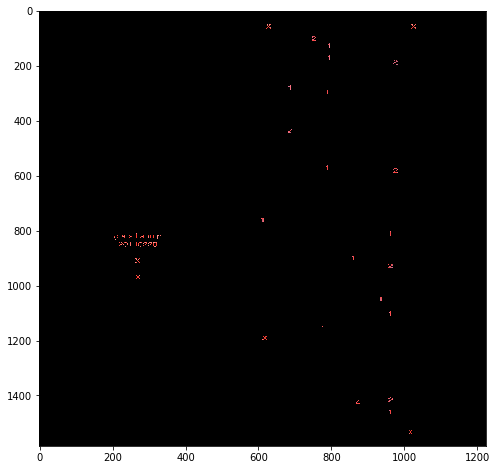

In [51]:
color = centers[8].astype('uint16')

max_red, min_red = (color+65), (color-65)

mask = cv2.inRange(img,min_red,max_red)

#result = cv2.bitwise_not(cv2.bitwise_and(img, img, mask=mask))
result =cv2.bitwise_and(img, img, mask=mask)
 
#result = cv2.cvtColor(cv2.cvtColor(result, cv2.COLOR_BGR2GRAY), cv2.COLOR_GRAY2BGR)
    
print(mask.sum(), min_red, max_red) #imshow(result)

#cv2.imwrite( "result.png", result );

img_new = Image.fromarray(result)
img_new.save("result.png", dpi=(72, 72))
imshow(result)


In [9]:
from pytesseract import Output

pytesseract.image_to_data('result.png',
                          config='--psm 11 --oem 3 -c tessedit_char_whitelist=0123456789X', 
                          output_type=Output.DICT)


{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1],
 'left': [0,
  206,
  206,
  206,
  206,
  218,
  218,
  218,
  218,
  272,
  264,
  264,
  264,
  264,
  264,
  264,
  264,
  264],
 'top': [0,
  810,
  810,
  810,
  810,
  841,
  841,
  841,
  841,
  841,
  900,
  900,
  900,
  900,
  960,
  960,
  960,
  960],
 'width': [1224,
  129,
  129,
  129,
  129,
  105,
  105,
  105,
  52,
  51,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13],
 'height': [1584,
  23,
  23,
  23,
  23,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17],
 'conf': ['-1',
  '-1',
  '-1',
  '-1',
  91,
  '-1',
  '-1',
  '-1',
  12,


In [10]:
#### extract all contours
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
_, contours, _  = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours[0].shape

(46, 1, 2)

In [70]:
pd.Series(imgray).hist()

NameError: name 'pd' is not defined

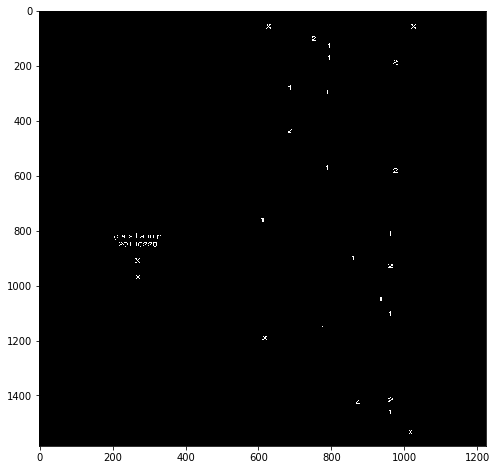

In [90]:
imgray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 10, 255, cv2.THRESH_BINARY)

plt.figure(figsize = (8,8))
plt.imshow(thresh, interpolation='nearest', aspect='auto', cmap='gray')
Image.fromarray(thresh).save("grey.png", dpi=(72, 72))


50


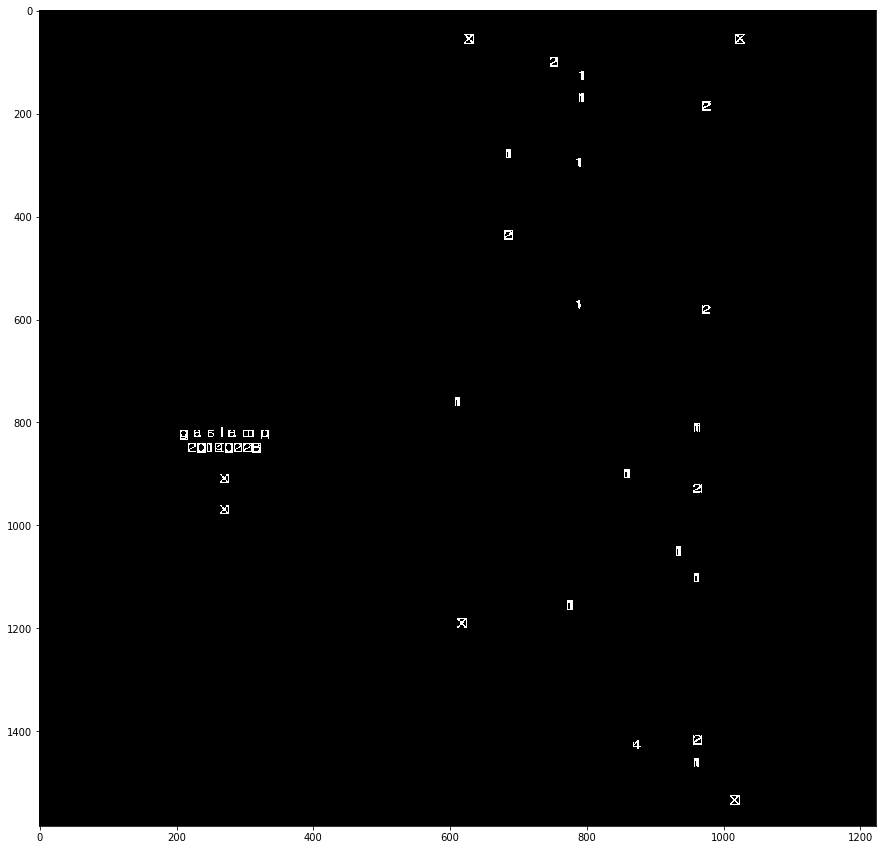

In [92]:
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

i = thresh.copy()

#cont = cv2.drawContours(result.copy(), contours[0:100], -1, (0,255,0), 3)

print(len(contours))

for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    # draw a white rectangle to visualize the bounding rect
    cv2.rectangle(i, (x, y), (x + w, y + h), 255, 1)
    
plt.figure(figsize = (15, 15))
plt.imshow(i, interpolation='nearest', aspect='auto', cmap='gray')
Image.fromarray(i).save("bounds.png", dpi=(72, 72))


In [39]:
len(contours)

242